In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import copy
from tqdm import tqdm
import time
import scipy
from sklearn.decomposition import PCA
import random

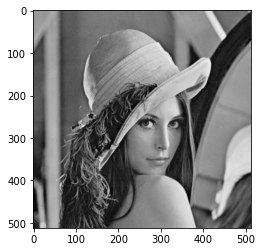

(512, 512)


In [2]:
"""
    3.Image Filtering
"""
img = cv2.imread("./lena.png", cv2.IMREAD_GRAYSCALE)

# displaying image
#img = cv2.cvtColor(img, )
plt.imshow(img, cmap="gray")
plt.show()
print(img.shape)

In [3]:
# σ : sigma
def GaussianKenrel(sigma):
    GK = np.zeros((3, 3))
    for i in range(3):
        for j in range(3):
            x = i - 1
            y = j - 1
            GK[i][j] = np.exp( -(x*x + y*y)/(2*sigma*sigma) ) / (2*np.pi*sigma*sigma )
    return GK

print( 1 / (2 * np.log(2)) )
GK = GaussianKenrel( 1 / (2 * np.log(2)) )
print( GK )

0.7213475204444817
[[0.04476089 0.11700781 0.04476089]
 [0.11700781 0.30586589 0.11700781]
 [0.04476089 0.11700781 0.04476089]]


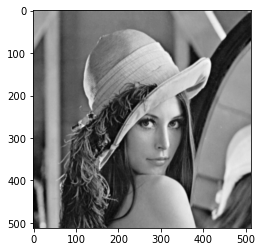

True

In [4]:
"""
    1).Implement a discrete 2D Gaussian filter. Use the provided lena.png as 
    input, and plot the output image in your report. Briefly describe the 
    effect of the filter.
"""
blurImg = cv2.filter2D(img, -1, GK)
plt.imshow(blurImg, cmap="gray")
plt.show()
cv2.imwrite("blurImg.png", blurImg)

[[-0.5  0.   0.5]]
[[-0.5]
 [ 0. ]
 [ 0.5]]


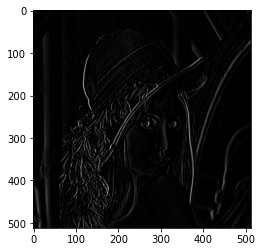

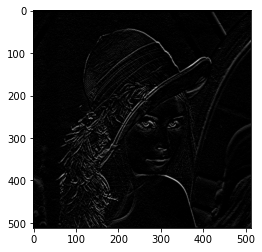

In [12]:
"""
    2).Implement the 1D convolution kernels, kx, ky derivatives
"""

def myNormalize(A):
    minValue = np.min(A)
    maxValue = np.max(A)
    return (A - minValue ) / (maxValue - minValue)


kx = np.array([[-0.5, 0, 0.5]])
ky = kx.T
print(kx)
print(ky)
Ix = cv2.filter2D(img, -1, kx)
Iy = cv2.filter2D(img, -1, ky)
cv2.imwrite("Ix.png", myNormalize(Ix)*255)
plt.imshow(Ix, cmap="gray")
plt.show()
cv2.imwrite("Iy.png", myNormalize(Iy)*255)
plt.imshow(Iy, cmap="gray")
plt.show()

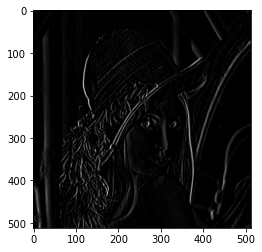

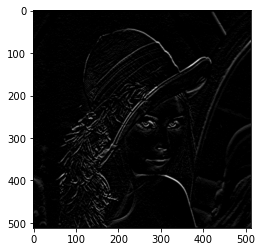

In [6]:
"""
    3).Define the gradient magnitude image Im(x, y) = sqrt( Ix(x, y)^2 + Iy(x, y)^2 )
"""
bIx = cv2.filter2D(blurImg, -1, kx)
bIy = cv2.filter2D(blurImg, -1, ky)
plt.imshow(bIx, cmap="gray")
plt.show()
plt.imshow(bIy, cmap="gray")
plt.show()

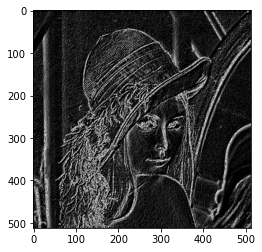

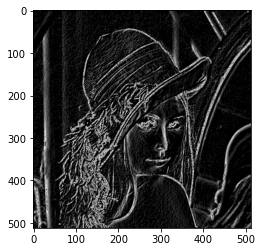

True

In [13]:
imgGradient = np.sqrt( np.square(Ix) + np.square(Iy) )
imgGradient = myNormalize(imgGradient)
imgGradient = imgGradient.astype(np.float64)
plt.imshow(imgGradient, cmap="gray")
plt.show()
bImgGradient = np.sqrt( np.square(bIx) + np.square(bIy) )
bImgGradient = myNormalize(bImgGradient)
bImgGradient = bImgGradient.astype(np.float64)
plt.imshow(bImgGradient, cmap="gray")
plt.show()
cv2.imwrite("imgGradient.png", myNormalize(imgGradient)*255)
cv2.imwrite("bImgGradient.png", myNormalize(bImgGradient)*255)